<a href="https://colab.research.google.com/github/zcqin/PRML-2025/blob/main/Linear_Algebra_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Algebra for Pattern Recognition and Machine Learning - Part 3**

**Zengchang Qin (PhD)**

zengchang.qin@gmail.com


Linear Transformed Space

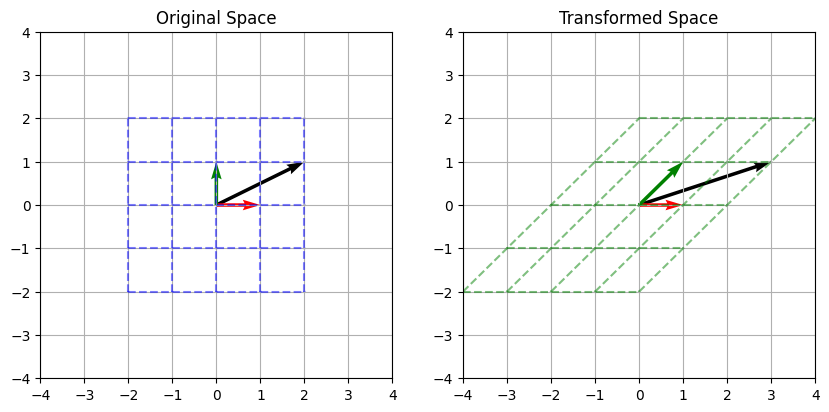

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear transformation matrix
A = np.array([[1, 1],
              [0, 1]])


# Generate grid lines in the original space
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

# Define the base vectors i = [1, 0] and j= [0, 1]
vi = np.array([1, 0])
vj = np.array([0, 1])

# Define a vector:
v = np.array([2, 1])

# Transform the vector using the matrix A
vi_transformed = A.dot(vi)
vj_transformed = A.dot(vj)

v_transformed = A.dot(v)


# Plot the original grid lines and the vector
fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))

ax[0].quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)

for i in range(len(x)):
    ax[0].plot(X[i,:], Y[i,:], 'b--', alpha=0.5)
    ax[0].plot(X[:,i], Y[:,i], 'b--', alpha=0.5)


# Draw the original vector in the original space
ax[0].quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black', width=0.01)
ax[0].quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
ax[0].quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='green', width=0.01)


ax[0].set_title('Original Space')
ax[0].set_xlim([-4, 4])
ax[0].set_ylim([-4, 4])
ax[0].grid(True)

# Apply the linear transformation to the grid lines
X_transformed, Y_transformed = A.dot(np.vstack([X.flatten(), Y.flatten()]))

# Reshape for plotting
X_transformed = X_transformed.reshape(X.shape)
Y_transformed = Y_transformed.reshape(Y.shape)

# Plot the transformed grid lines and the transformed vector
ax[1].quiver(X_transformed, Y_transformed, U, V, angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5)
for i in range(len(x)):
    ax[1].plot(X_transformed[i,:], Y_transformed[i,:], 'g--', alpha=0.5)
    ax[1].plot(X_transformed[:,i], Y_transformed[:,i], 'g--', alpha=0.5)

# Draw the transformed vector in the new space
ax[1].quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='black', width=0.01)

ax[1].quiver(0, 0, vi_transformed[0], vi_transformed[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
ax[1].quiver(0, 0, vj_transformed[0], vj_transformed[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.01)


ax[1].set_title('Transformed Space')
ax[1].set_xlim([-4, 4])
ax[1].set_ylim([-4, 4])
ax[1].grid(True)

plt.show()


Determinant


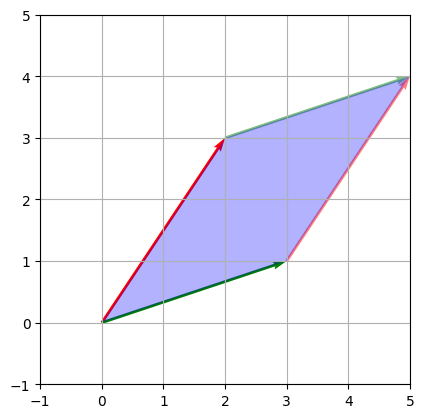

(None, -7.000000000000001)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 matrix
#A = np.array([[3, 2],
#              [1, 3]])

A = np.array([[2, 3],
              [3, 1]])


# Calculate the determinant
det_A = np.linalg.det(A)

# Plot the parallelogram formed by the column vectors of the matrix
origin = np.zeros(2)
v1 = A[:, 0]
v2 = A[:, 1]

plt.quiver(*origin, *v1, scale=1, scale_units='xy', angles='xy', color='r')
plt.quiver(*origin, *v2, scale=1, scale_units='xy', angles='xy', color='g')
plt.quiver(*v1, *v2, scale=1, scale_units='xy', angles='xy', color='g', alpha=0.5)
plt.quiver(*v2, *v1, scale=1, scale_units='xy', angles='xy', color='r', alpha=0.5)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')

plt.fill([0, v1[0], v1[0]+v2[0], v2[0]], [0, v1[1], v1[1]+v2[1], v2[1]], 'b', alpha=0.3)
plt.grid(True)
plt.show(), det_A



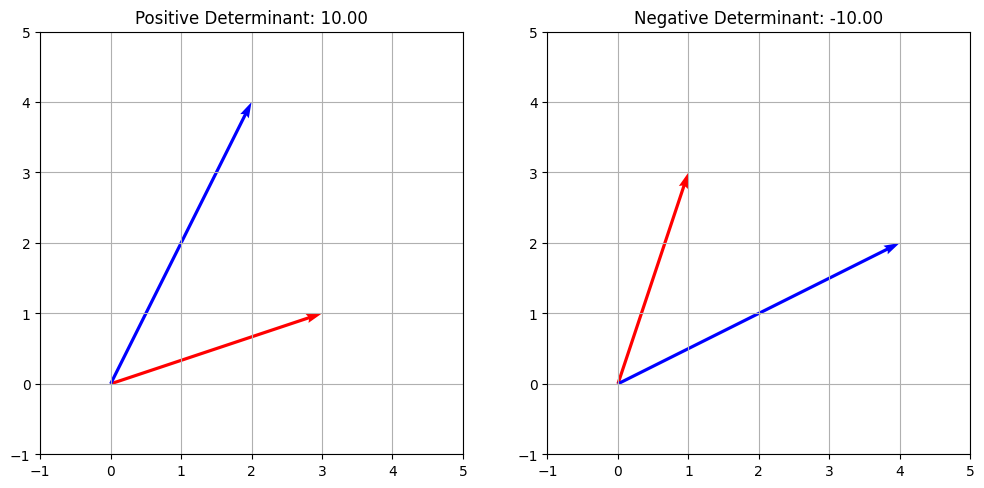

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two 2x2 matrices, one with a positive determinant and one with a negative determinant
A_positive = np.array([[3, 1],
                       [2, 4]])
A_negative = np.array([[1, 3],
                       [4, 2]])

# Calculate the determinants
det_positive = np.linalg.det(A_positive)
det_negative = np.linalg.det(A_negative)

# Plot the parallelograms for both matrices
plt.figure(figsize=(12, 6))

# Positive determinant
plt.subplot(1, 2, 1)
plt.quiver([0, 0], [0, 0], A_positive[:, 0], A_positive[:, 1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Positive Determinant: {det_positive:.2f}')
plt.grid(True)

# Negative determinant
plt.subplot(1, 2, 2)
plt.quiver([0, 0], [0, 0], A_negative[:, 0], A_negative[:, 1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Negative Determinant: {det_negative:.2f}')
plt.grid(True)

plt.show()


SVD - Singular Value Decomposition

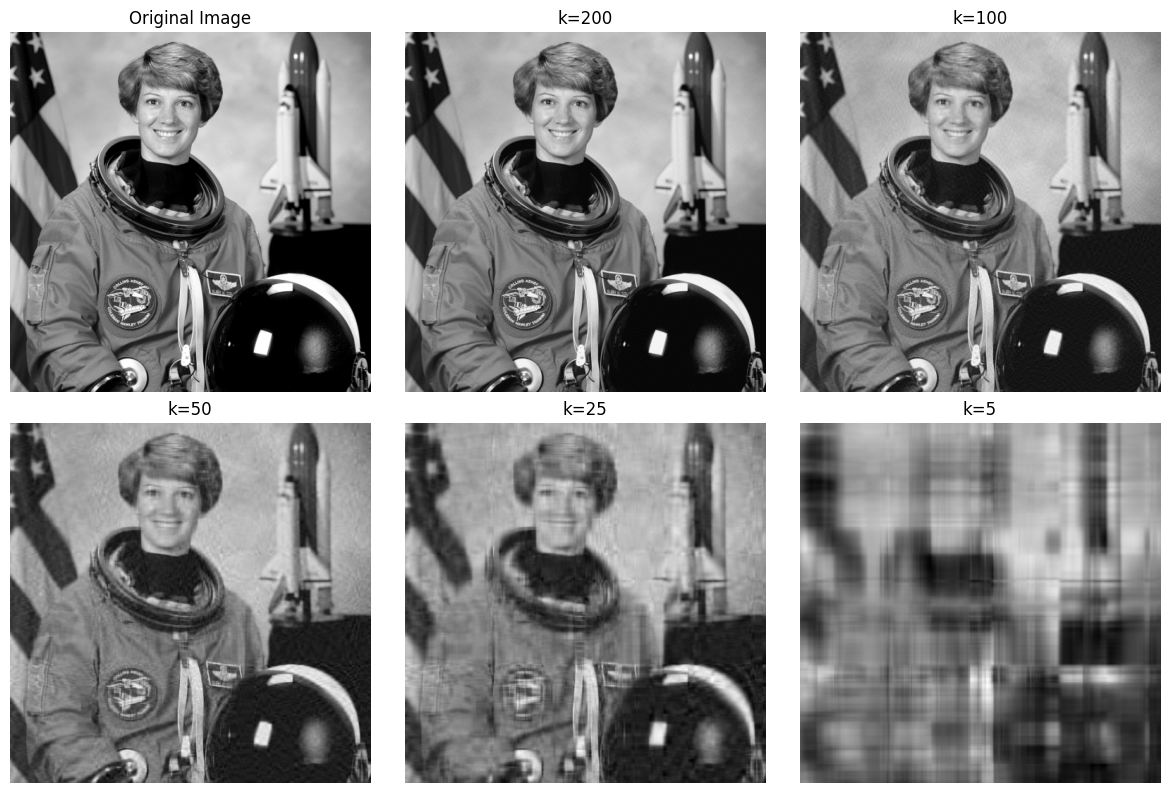

In [ ]:
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Load an example image and convert it to grayscale
image = rgb2gray(data.astronaut())
# Perform SVD
U, sigma, VT = svd(image)

# Function to reconstruct image from SVD components
def reconstruct_image(U, sigma, VT, k):
    # Reconstruct the image with the first k singular values/vectors
    sigma_reduced = np.zeros((U.shape[0], VT.shape[0]))
    sigma_reduced[:k, :k] = np.diag(sigma[:k])
    return U[:, :k] @ sigma_reduced[:k, :k] @ VT[:k, :]

# Define different levels of compression
k_values = [200, 100, 50, 25, 5]

# Initialize plot
plt.figure(figsize=(12, 8))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot images with reduced dimensions
for i, k in enumerate(k_values, start=2):
    compressed_image = reconstruct_image(U, sigma, VT, k)
    plt.subplot(2, 3, i)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')

plt.tight_layout()
plt.show()
